In [1]:
import os

import random

from __future__ import absolute_import, division, print_function, unicode_literals
import sys
print("Python executable:", sys.executable)
import tensorflow as tf
tf.config.experimental.enable_op_determinism()
print("TF 版本:", tf.__version__)
print("CUDA 版本:", tf.sysconfig.get_build_info().get("cuda_version"))
print("cuDNN 版本:", tf.sysconfig.get_build_info().get("cudnn_version"))

import tensorflow as tf; tf.config.list_physical_devices('GPU')
print("可用 GPU 设备:", tf.config.list_physical_devices('GPU'))
from tensorflow.keras import datasets, layers, models, Model
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import cv2
print("OpenCV 版本:", cv2.__version__)
from matplotlib import pyplot
import h5py
from tensorflow.keras.utils import img_to_array
import numpy as np
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

Python executable: E:\Anaconda3\python.exe
TF 版本: 2.18.0
CUDA 版本: None
cuDNN 版本: None
可用 GPU 设备: []
OpenCV 版本: 4.11.0


In [40]:

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0


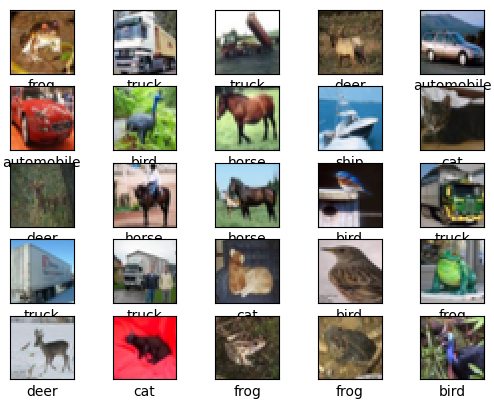

In [41]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

for i in range(25):
    plt.subplot(5, 5, i + 1)  
    plt.xticks([])  
    plt.yticks([]) 
    plt.grid(False)  #
    plt.imshow(train_images[i])  
    plt.xlabel(class_names[train_labels[i][0]])  

plt.show() 

In [42]:

SEED = 0
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

model = Sequential([

    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3),
           kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same',
           kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Conv2D(64, (3, 3), activation='relu', padding='same',
           kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same',
           kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

E:\Anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_29               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_31               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_32               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_33               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,171,178 (8.28 MB)

 Trainable params: 2,169,770 (8.28 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [43]:
#Pour afficher l'architecture du modele CNN
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_29               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_31               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_32               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_33               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,171,178 (8.28 MB)

 Trainable params: 2,169,770 (8.28 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [44]:
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=200,
    validation_data=(x_test, y_test),
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

model.save(r"C:\Users\Clay\Desktop\MN\Biometric\TP-CNN\model\lite02_200ep.h5")

 

E:\Anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 77ms/step - accuracy: 0.3793 - loss: 2.1147 - val_accuracy: 0.4903 - val_loss: 1.6370 - learning_rate: 0.0010
Epoch 2/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 83ms/step - accuracy: 0.5875 - loss: 1.3142 - val_accuracy: 0.6219 - val_loss: 1.3125 - learning_rate: 0.0010
Epoch 3/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 82ms/step - accuracy: 0.6414 - loss: 1.1840 - val_accuracy: 0.6528 - val_loss: 1.2008 - learning_rate: 0.0010
Epoch 4/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 84ms/step - accuracy: 0.6821 - loss: 1.0980 - val_accuracy: 0.7046 - val_loss: 1.0497 - learning_rate: 0.0010
Epoch 5/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 83ms/step - accuracy: 0.7019 - loss: 1.0735 - val_accuracy: 0.7075 - val_loss: 1.0728 - learning_rate: 0.0010
Epoch 6/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 82ms/step - accuracy: 0.7151 - loss: 1.0610 - val_accuracy: 0.7436 - val_loss: 1.0235 - learning_rate: 0.0010
Epoch 7/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 82ms/step - accuracy: 0.7

Test accuracy: 0.8907


In [2]:
model=load_model(r"C:\Users\Clay\Desktop\MN\Biometric\TP-CNN\all model\lite02_200ep.h5")

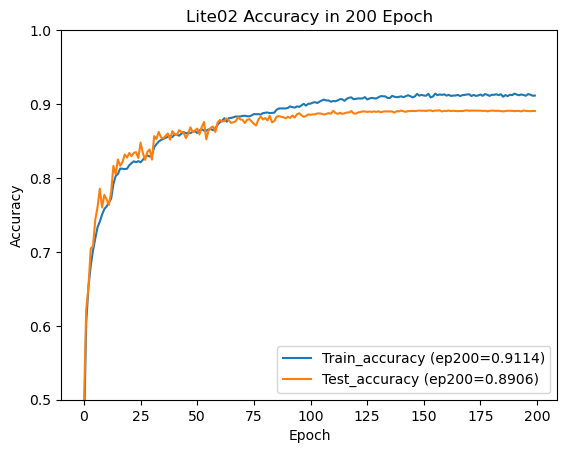

In [49]:
# 100个epoch
train_acc = history.history['accuracy'][-1]
test_acc  = history.history['val_accuracy'][-1]

# （accuracy vs epochs）
plt.plot(history.history['accuracy'],
         label=f"Train_accuracy (ep200={train_acc:.4f})") 
plt.plot(history.history['val_accuracy'],
         label=f"Test_accuracy (ep200={test_acc:.4f})")  
plt.xlabel('Epoch')  # X 轴标签：（Epoch）
plt.ylabel('Accuracy')  # Y 轴标签：（Accuracy）
plt.ylim([0.5, 1])  #  0.5 到 1 
plt.title('Lite02 Accuracy in 200 Epoch')  
plt.legend(loc='lower right') 

plt.savefig(r'C:\Users\Clay\Desktop\MN\Biometric\TP-CNN\training history\Lite02_200Epoch.png') 
plt.show()  

In [3]:
import pandas as pd

history_dict = history.history

df = pd.DataFrame({
    "Train_accuracy": history_dict["accuracy"],
    "Train_loss": history_dict["loss"],
    "Test_accuracy": history_dict["val_accuracy"],
    "Test_loss": history_dict["val_loss"]
})

df_history = pd.DataFrame(history.history)
df_history.to_csv('history.csv', index=False)


NameError: name 'history' is not defined

In [4]:
print(test_acc)

NameError: name 'test_acc' is not defined

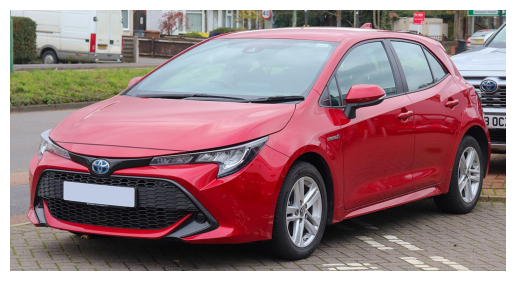

In [8]:

img = cv2.imread(r"C:\Users\Clay\Desktop\MN\Biometric\TP-CNN\car.jpg")  

img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_cvt)
plt.axis('off') 
plt.show()


In [9]:
img = cv2.resize(img_cvt, (32,32))
img = img.astype('float32')
img= img / 255.0
imgs = tf.expand_dims(
    img,
    axis=0,
    name=None
)
model.predict(imgs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


array([[6.9112032e-09, 9.9925536e-01, 7.3332435e-10, 2.0567021e-09,
        9.0645023e-07, 4.4219717e-09, 9.1182920e-07, 1.6849153e-05,
        4.5720969e-09, 7.2604290e-04]], dtype=float32)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


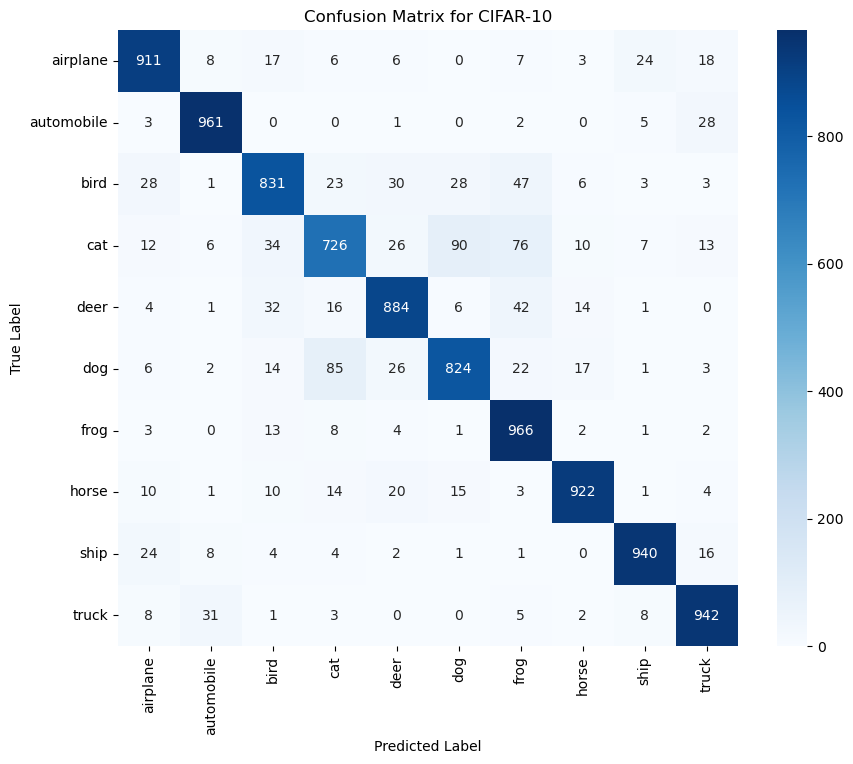

In [6]:
import seaborn as sns
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix

(_, _), (x_test, y_test) = cifar10.load_data()

x_test = x_test.astype('float32') / 255.0

y_test = y_test.flatten()

predictions = model.predict(x_test)

predicted_classes = np.argmax(predictions, axis=1)

cm = confusion_matrix(y_test, predicted_classes)

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for CIFAR-10 Lite V2')
plt.show()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 896 (3.50 KB)

 Trainable params: 896 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


C:\Users\MI\AppData\Roaming\Python\Python312\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer']
Received: inputs=Tensor(shape=(1, 32, 32, 3))
  warnings.warn(msg)


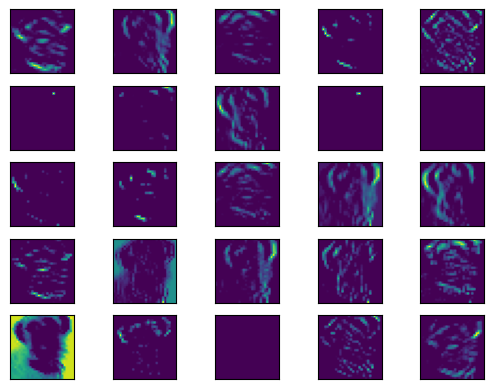

In [45]:
i=0

square = 5
ix = 1

model2 = Model(inputs=model.inputs, outputs=model.layers[i].output)
 
model2.summary()

feature_maps = model2.predict(imgs)
    
for _ in range(square):
  for _ in range(square):
  
        ax = pyplot.subplot(square, square, ix)
        ax.set_xticks([])  
        ax.set_yticks([])  
        
        pyplot.imshow(feature_maps[0, :, :, ix-1])

        ix += 1

pyplot.show()
